In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df_data = pd.read_csv("../Data/preprocessed_alcohol_balance.csv")
df_data = df_data.drop("Unnamed: 0", axis=1)
# display(df_data)

In [41]:
chars = ["array([[2]], dtype=uint8", "array", "\n", "[", "]", "(", ")"]

def string_to_ndarray(sd):
    for char in chars:
        sd = sd.replace(char, "")

    sd = sd.replace("   ", " ")
    sd = sd[:-2]

    sd_lst = sd.split(" ")
    sd_lst = [float(i) for i in sd_lst]

    sd_arr = np.asarray(sd_lst)
    sd_arr = np.split(sd_arr, len(sd_arr)/3)
    
    return np.asarray(sd_arr)

#### Adding Mean Average Distance

In [11]:
def calculate_mad(data, axis=None):
    return np.mean(np.absolute(data - np.mean(data, axis)), axis)

In [12]:
mads = []
for i, _ in df_data.iterrows():
    mad = df_data["SegmentData"][i]
    mad_arr = string_to_ndarray(mad)
    mad = calculate_mad(mad_arr[:,0])
    mads.append(mad)

col = pd.Series(mads)
df_data["mad_SegmentData"] = col.values

In [45]:
# display(df_data)
# df_data.to_csv(path_or_buf="../Data/preprocessed_alcohol_balance.csv", index=False)

#### Adding Standard deviations

In [42]:
stds = []
for i, _ in df_data.iterrows():
    sd = df_data["SegmentData"][i]
    sd_arr = string_to_ndarray(sd)
    std = np.std(sd_arr[:,0])
    stds.append(std)

col = pd.Series(stds)
df_data["std_SegmentData"] = col.values

In [46]:
# display(df_data)
# df_data.to_csv(path_or_buf="../Data/preprocessed_alcohol_balance.csv", index=False)

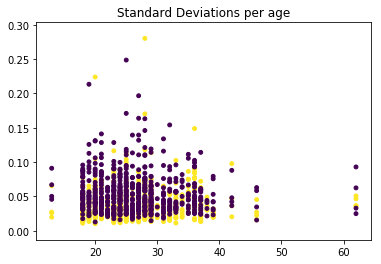

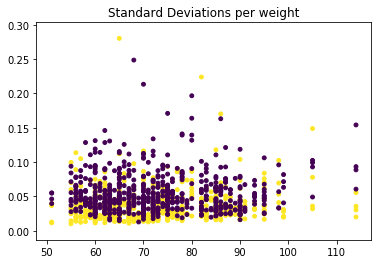

In [68]:
categories = np.unique(df_data["Conditie"])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors)) 

df_data["Color"] = df_data["Conditie"].apply(lambda x: colordict[x])
plt.scatter(df_data["SubjectID"], df_data["std_SegmentData"], c=df_data.Color, s=15)
plt.title("Standard Deviations per Subject")
plt.show()

plt.scatter(df_data["Age"], df_data["std_SegmentData"], c=df_data.Color, s=15)
plt.title("Standard Deviations per age")
plt.show()

plt.scatter(df_data["Weight"], df_data["std_SegmentData"], c=df_data.Color, s=15)
plt.title("Standard Deviations per weight")
plt.show()

plt.scatter(df_data["Height"], df_data["std_SegmentData"], c=df_data.Color, s=15)
plt.title("Standard Deviations per height")
plt.show()



#### Adding variance

In [69]:
varss = []
for i in range(0, 720):
    sd = df_data["SegmentData"][i]
    sd_arr = string_to_ndarray(sd)
    var = np.var(sd_arr[:,0])
    varss.append(var)

col = pd.Series(varss)
df_data["var_SegmentData"] = col.values

ValueError: Length of values does not match length of index

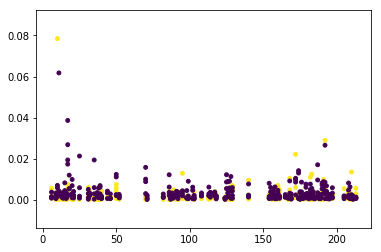

In [27]:
categories = np.unique(df_data["Conditie"])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors)) 

df_data["Color"] = df_data["Conditie"].apply(lambda x: colordict[x])
plt.scatter(df_data["SubjectID"], df_data["var_SegmentData"], c=df_data.Color, s=15)
plt.show()

In [89]:
# mean std of norm
stds = []
for i in range(0, 360):
    sd = df_data["SegmentData"][i]
    sd_arr = string_to_ndarray(sd)
    std = np.std(sd_arr[:,0])
    stds.append(std)
    
print(np.mean(stds))

0.03705270416192119


In [85]:
# mean std of bril
stds = []
for i in range(360, 720):
    sd = df_data["SegmentData"][i]
    sd_arr = string_to_ndarray(sd)
    std = np.std(sd_arr[:,0])
    stds.append(std)
    
print(np.mean(stds))

0.05215266133590558
